# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

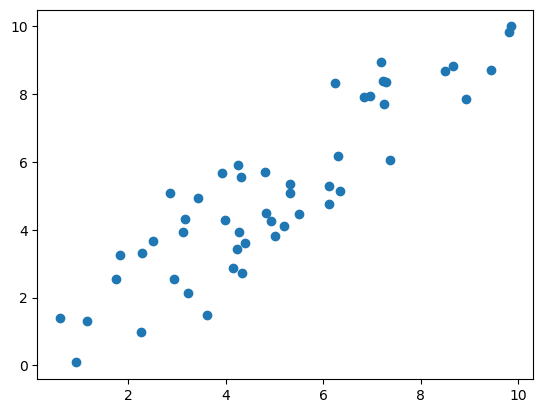

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

# Gerando o dataframe
df = pd.DataFrame({'p1': p1, 'p2': p2})

#Distribuição dados dataframe
plt.scatter(x = df.p1, y=df.p2);

### a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [2]:
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.head()

,p1,p2,média,evolução
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


### b) Calcule a correlação entre os dados da p1 e p2

In [3]:
corr = np.corrcoef(df.p1,df.p2)
corr[0,1]

0.8957365818728046

### c) Calcule a correlação entre os dados transformados (média e diferença)s.

In [4]:
corr2 = np.corrcoef(df.média,df.evolução)
corr2[0,1]

0.13347385411788837

### d) Comente as correlações observadas.

 - A correlação entre os dados p1 e p2 é de 0,89, indicando uma forte relação positiva, ou seja, tendem a acompanhar uma a outra, seja subindo ou caindo.
 - Já a correlação dos dados de média e diferença é baixa, indicando que são mais dispersos.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [5]:
df['soma'] = df.p1+df.p2
df.head()

,p1,p2,média,evolução,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


In [6]:
corr = np.corrcoef(df.soma,df.evolução)
corr[0,1]

0.13347385411788837

Apenas olhando os números correspondentes à correlação entre diferença e soma (0.1334) e diferença e média (0.1334), podemos notar que os valores são os mesmos.

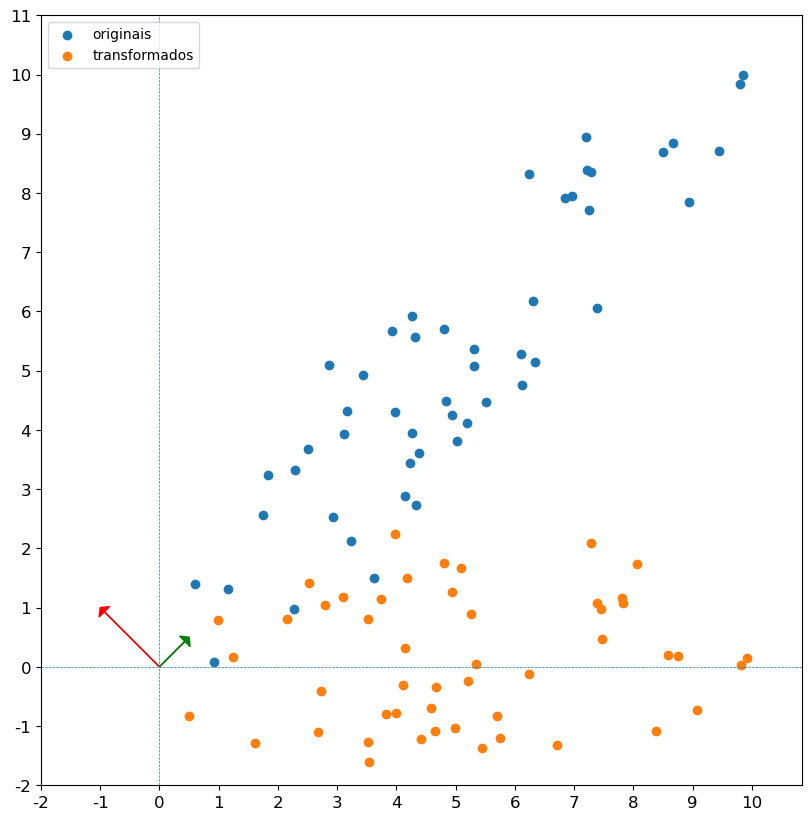

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -2
xmax = df.p1.max()*1.1
ymin = -2
ymax = df.p2.max()*1.1

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

ax.arrow(0, 0, m[0,0], m[0,1]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[1,0], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)

plt.scatter(x = df.p1, y=df.p2, label = 'originais')
plt.scatter(x = df['média'], y=df['evolução'], label = 'transformados')

ax.legend(loc='upper left')

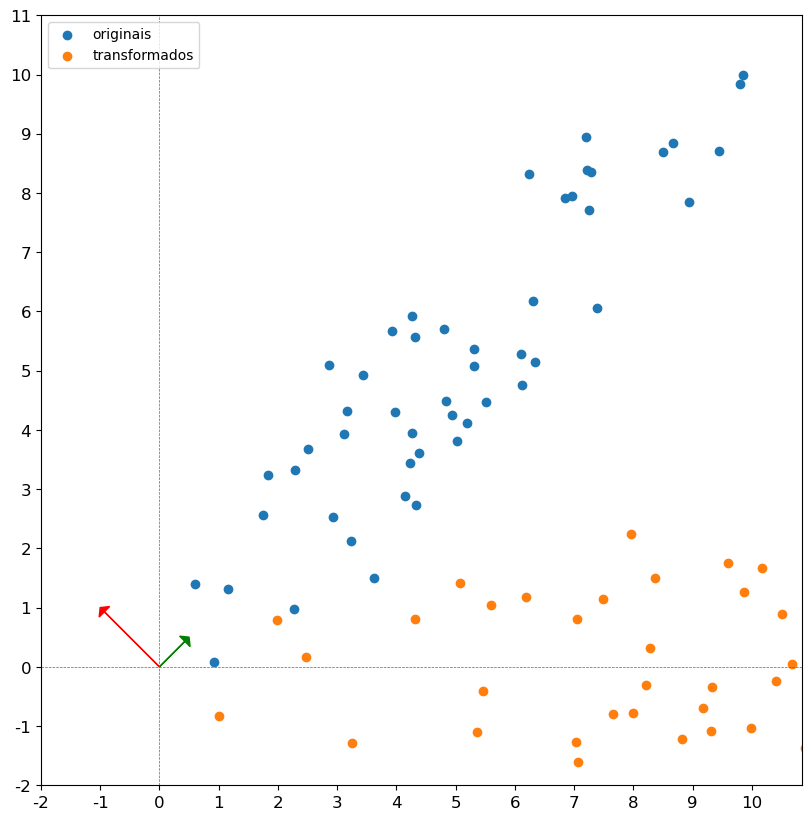

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -2
xmax = df.p1.max()*1.1
ymin = -2
ymax = df.p2.max()*1.1

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

ax.arrow(0, 0, m[0,0], m[0,1]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[1,0], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)

plt.scatter(x = df.p1, y=df.p2, label = 'originais')
plt.scatter(x = df['soma'], y=df['evolução'], label = 'transformados')

ax.legend(loc='upper left')

Podemos notar, ao plotar os gráficos, que há diferenças nos dados transformados pela média e pela soma.

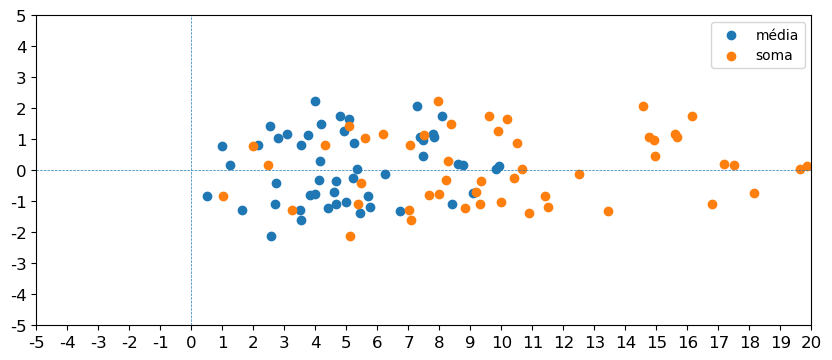

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar a média
plt.scatter(df['média'], df['evolução'], label='média')

# Plotar a soma
plt.scatter(df['soma'], df['evolução'], label='soma')

#Legenda
plt.legend()

Nesse último gráfico, podemos então confirmar que o gráfico da soma é uma versão esticada do gráfico da média, com a soma sendo proporcional à média. A distribuição dos pontos em ambos os gráficos será semelhante, e a correlação (corr) entre os dados permanecerá a mesma para ambos os gráficos.